In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 벡터와 행렬 기초 - 머신러닝을 위한 선형대수

**학습 목표**

- 벡터와 행렬의 기본 개념을 머신러닝 관점에서 이해  
- 실제 데이터 구조와 연결하여 직관적 이해  
- NumPy를 활용한 효율적인 벡터/행렬 연산  
- 머신러닝에서의 실제 활용 사례 경험

---

## 1. 벡터의 기본 개념
### 1.1 벡터란 무엇인가?

> 수학적 정의: 크기와 방향을 가진 양   
> 머신러닝 관점: 하나의 데이터 포인트를 표현하는 숫자들의 집합  

예시:

집 데이터: [면적, 방수, 화장실수, 층수] = [85, 3, 2, 5]  
이미지 픽셀: [빨강값, 초록값, 파랑값] = [255, 128, 0]  
고객 특성: [나이, 소득, 구매횟수] = [35, 50000, 12]

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# 집 데이터 예시 (벡터) - 서로 다른 타입
house_1 = np.array([85, 3, 2, 5])    # 일반 아파트
house_2 = np.array([200, 5, 3, 2])   # 넓은 단층집
house_3 = np.array([45, 1, 1, 15])   # 좁은 고층 오피스텔

print("집 1의 특성:", house_1)
print("집 2의 특성:", house_2)
print("집 3의 특성:", house_3)
print()
print("벡터의 차원(특성 수):", house_1.shape)
print("벡터의 타입:", type(house_1))

집 1의 특성: [85  3  2  5]
집 2의 특성: [200   5   3   2]
집 3의 특성: [45  1  1 15]

벡터의 차원(특성 수): (4,)
벡터의 타입: <class 'numpy.ndarray'>


응용:

- 데이터 포인트 = 하나의 관측값 또는 샘플 (여기서는 집 1개)  
- 벡터: 데이터 포인트를 숫자로 표현한 것  
- NumPy 배열의 기본 구조:  
    shape: 배열의 형태 (여기서는 4개 원소의 1차원)  
    type: numpy.ndarray 객체 (NumPy의 다차원 배열 객체)  
    Python 리스트보다 빠르고 메모리 효율적

Python 리스트 [85, 3, 2, 5]와 다른 점:  
    NumPy 배열은 모든 원소가 같은 타입 (보통 float64)  
    벡터화 연산 가능 (한 번에 모든 원소 계산)  
    메모리 효율적 저장

---

## 2. 벡터 연산의 의미
### 2.1 벡터 덧셈과 스칼라 곱

> 벡터 덧셈: 특성들의 합성  
 스칼라 곱: 특성들의 스케일링  

두 집의 특성 합: [285   8   5   7]
평균 특성: [142.5   4.    2.5   3.5]

2배 스케일링된 집: [170   6   4  10]

집 2와 집 1의 특성 차이: [115   2   1  -3]



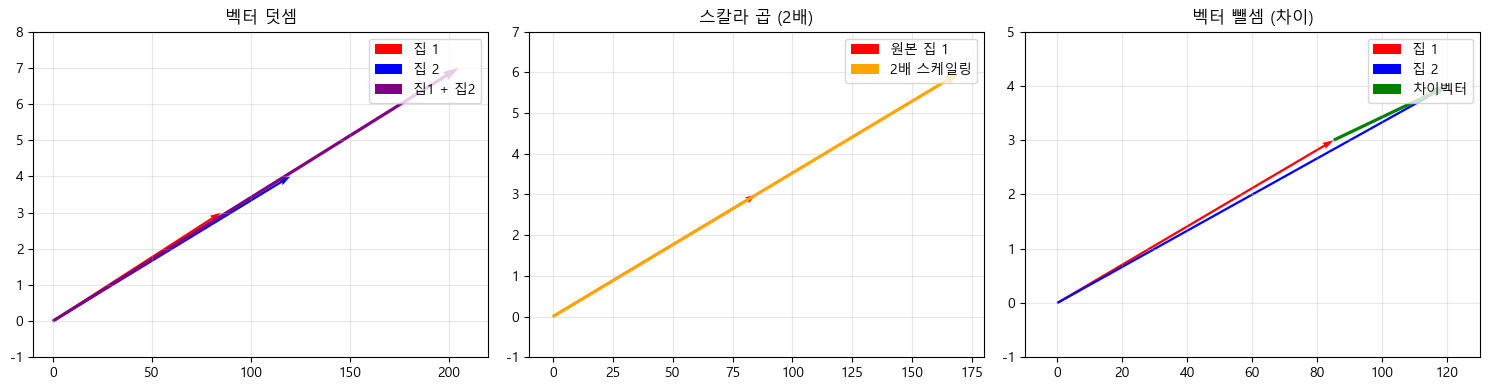

In [39]:
# 윈도우 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 벡터 덧셈과 스칼라 곱
total_features = house_1 + house_2
print("두 집의 특성 합:", total_features)
print("평균 특성:", total_features / 2)
print()

# 스칼라 곱 - 특성을 2배로 스케일링
scaled_house = 2 * house_1
print("2배 스케일링된 집:", scaled_house)
print()

# 벡터 뺄셈 - 두 집의 특성 차이
difference = house_2 - house_1
print("집 2와 집 1의 특성 차이:", difference)
print()

# 벡터 연산 시각화 (2D로 단순화)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 1) 벡터 덧셈 시각화
house_2d_1 = np.array([85, 3])
house_2d_2 = np.array([120, 4])
sum_2d = house_2d_1 + house_2d_2

axes[0].quiver(0, 0, house_2d_1[0], house_2d_1[1], angles='xy', scale_units='xy', scale=1, 
               color='red', width=0.005, label='집 1')
axes[0].quiver(0, 0, house_2d_2[0], house_2d_2[1], angles='xy', scale_units='xy', scale=1, 
               color='blue', width=0.005, label='집 2')
axes[0].quiver(0, 0, sum_2d[0], sum_2d[1], angles='xy', scale_units='xy', scale=1, 
               color='purple', width=0.007, label='집1 + 집2')
axes[0].set_xlim(-10, 220)
axes[0].set_ylim(-1, 8)
axes[0].set_title('벡터 덧셈')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2) 스칼라 곱 시각화
scaled_2d = 2 * house_2d_1

axes[1].quiver(0, 0, house_2d_1[0], house_2d_1[1], angles='xy', scale_units='xy', scale=1, 
               color='red', width=0.005, label='원본 집 1')
axes[1].quiver(0, 0, scaled_2d[0], scaled_2d[1], angles='xy', scale_units='xy', scale=1, 
               color='orange', width=0.007, label='2배 스케일링')
axes[1].set_xlim(-10, 180)
axes[1].set_ylim(-1, 7)
axes[1].set_title('스칼라 곱 (2배)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# 3) 벡터 뺄셈 시각화
diff_2d = house_2d_2 - house_2d_1

axes[2].quiver(0, 0, house_2d_1[0], house_2d_1[1], angles='xy', scale_units='xy', scale=1, 
               color='red', width=0.005, label='집 1')
axes[2].quiver(0, 0, house_2d_2[0], house_2d_2[1], angles='xy', scale_units='xy', scale=1, 
               color='blue', width=0.005, label='집 2')
axes[2].quiver(house_2d_1[0], house_2d_1[1], diff_2d[0], diff_2d[1], angles='xy', scale_units='xy', scale=1, 
               color='green', width=0.007, label='차이벡터')
axes[2].set_xlim(-10, 130)
axes[2].set_ylim(-1, 5)
axes[2].set_title('벡터 뺄셈 (차이)')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

응용: 

데이터 전처리에서 평균 계산  
특성 스케일링 (정규화)  
데이터 포인트간 차이 계산

---

### 2.2 벡터의 크기 (노름 norm)
> 데이터 포인트의 "강도" 또는 "크기"를 측정

집 1의 크기 (L2 노름): 85.22
NumPy로 계산한 크기: 85.22

집 1의 크기: 85.22
집 2의 크기: 200.09
집 3의 크기: 47.46



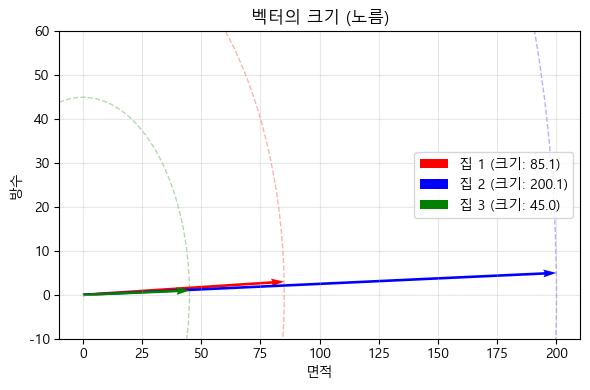

In [45]:
# L2 노름 (유클리드 거리)
def vector_norm(v):
    return np.sqrt(np.sum(v**2))

# 수동 계산
house_1_norm = vector_norm(house_1)
print(f"집 1의 크기 (L2 노름): {house_1_norm:.2f}")

# NumPy 내장 함수
house_1_norm_np = np.linalg.norm(house_1)
print(f"NumPy로 계산한 크기: {house_1_norm_np:.2f}")
print()

# 모든 집의 크기 비교
houses = [house_1, house_2, house_3]
house_names = ['집 1', '집 2', '집 3']

for name, house in zip(house_names, houses):
    norm = np.linalg.norm(house)
    print(f"{name}의 크기: {norm:.2f}")

print()

# 벡터 크기(노름) 시각화 - 2D 벡터들과 그 크기
plt.figure(figsize=(6, 4))

vectors_2d = [np.array([85, 3]), np.array([200, 5]), np.array([45, 1])]
colors = ['red', 'blue', 'green']

for i, (vec, color, name) in enumerate(zip(vectors_2d, colors, house_names)):
    # 벡터 그리기
    plt.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1, 
               color=color, width=0.005, label=f'{name} (크기: {np.linalg.norm(vec):.1f})')
    
    # 크기를 나타내는 원호 그리기
    norm_val = np.linalg.norm(vec)
    circle = plt.Circle((0, 0), norm_val, fill=False, color=color, alpha=0.3, linestyle='--')
    plt.gca().add_patch(circle)

plt.xlim(-10, 210)
plt.ylim(-10, 60)
plt.title('벡터의 크기 (노름)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlabel('면적')
plt.ylabel('방수')
plt.tight_layout()
plt.show()

응용: 

데이터 포인트의 "세기" 측정  
정규화(normalization)의 기초  
거리 기반 알고리즘에서 핵심 개념

---

**노름이란 무엇인가?**  

수학적 정의: 벡터의 "크기"를 측정하는 함수  
직관적 이해: 원점(0,0,0...)에서 그 점까지의 거리  

노름을 "강도"와 "세기"라고 하는 이유:

기하학적: 원점에서 얼마나 멀리 있는가? (거리의 개념)  
물리적: 벡터가 나타내는 양이 얼마나 강한가? (힘의 크기)  
통계적: 데이터 포인트가 얼마나 "극단적"인가? (중심에서의 거리)  
머신러닝: 특성들이 종합적으로 얼마나 "큰" 값인가?  

핵심은 "종합적인 크기"를 하나의 숫자로 요약하는 것이다.

**실제 머신러닝에서 노름의 활용**  

**1. 정규화 (Normalization) - 데이터 전처리**

목적: 모든 벡터를 같은 "강도"로 만들어서 방향만 비교 (벡터의 크기를 1로 만들어서 "방향"만 남기기)  
언제: 데이터의 스케일을 맞출 때  
결과: 크기는 다르지만 비율이 같은 데이터를 동일하게 처리 가능

In [19]:
# 벡터를 단위 벡터로 만들기
def normalize_vector(v):
    return v / np.linalg.norm(v)

original = np.array([100, 3, 2, 5])
normalized = normalize_vector(original)

print("원래 벡터:", original)
print("정규화된 벡터:", normalized)
print("정규화된 벡터의 크기:", np.linalg.norm(normalized))  # 1.0

원래 벡터: [100   3   2   5]
정규화된 벡터: [0.9981054  0.02994316 0.01996211 0.04990527]
정규화된 벡터의 크기: 1.0


**2. 거리 계산**  
의미: 거리가 작을수록 유사한 집


In [20]:
# 두 집의 유사도 측정
house1 = np.array([85, 3, 2, 5])
house2 = np.array([90, 3, 2, 5])

distance = np.linalg.norm(house1 - house2)
print("두 집의 거리:", distance)  # 5.0

두 집의 거리: 5.0


**3. 정규화 기법 (Regularization) - 과적합 방지**  

목적: 모델의 가중치가 너무 커지는 것을 방지  
언제: 모델 학습 중에 과적합을 방지할 때

In [21]:
# 가중치 벡터의 크기를 제한
weights = np.array([2.5, -1.8, 0.9, 1.2])
weight_norm = np.linalg.norm(weights)

print("가중치 벡터의 크기:", weight_norm)
# 만약 너무 크면 과적합 위험 → 크기를 제한

가중치 벡터의 크기: 3.4263683398023628


---

**1번, 3번 차이**  

**1번 정규화 (Vector Normalization)**

In [11]:
import numpy as np

# 예시: 두 학생의 성적
student_A = np.array([60, 80, 90])  # 수학, 영어, 과학
student_B = np.array([600, 800, 900])  # 같은 비율이지만 10배 큰 점수

print("원래 데이터:")
print("학생 A:", student_A, "크기:", np.linalg.norm(student_A))
print("학생 B:", student_B, "크기:", np.linalg.norm(student_B))
print()

# 정규화 (크기를 1로 만들기)
student_A_norm = student_A / np.linalg.norm(student_A)
student_B_norm = student_B / np.linalg.norm(student_B)

print("정규화 후:")
print("학생 A:", student_A_norm, "크기:", np.linalg.norm(student_A_norm))
print("학생 B:", student_B_norm, "크기:", np.linalg.norm(student_B_norm))
print()
print("두 정규화된 벡터가 같은가?", np.allclose(student_A_norm, student_B_norm))

원래 데이터:
학생 A: [60 80 90] 크기: 134.5362404707371
학생 B: [600 800 900] 크기: 1345.362404707371

정규화 후:
학생 A: [0.44597649 0.59463532 0.66896473] 크기: 0.9999999999999999
학생 B: [0.44597649 0.59463532 0.66896473] 크기: 1.0

두 정규화된 벡터가 같은가? True


In [22]:
# 적용 대상: 입력 데이터
data = np.array([100, 200, 50])  # 원본 데이터
normalized_data = data / np.linalg.norm(data)  # 크기를 1로

print("데이터 정규화:")
print("전:", data, "크기:", np.linalg.norm(data))
print("후:", normalized_data, "크기:", np.linalg.norm(normalized_data))

데이터 정규화:
전: [100 200  50] 크기: 229.128784747792
후: [0.43643578 0.87287156 0.21821789] 크기: 1.0


목적: 입력 데이터의 스케일 통일  
결과: 모든 벡터의 크기가 1이 됨  
사용처: 코사인 유사도 계산, 신경망 입력층  

**크기는 다르지만 비율이 같은 데이터를 동일하게 처리 가능**

**3번 정규화 (Model Regularization)**

In [23]:
# 예시: 선형 회귀 모델의 가중치
# 집 가격 = w1*면적 + w2*방수 + w3*화장실수 + w4*층수

# 과적합된 모델의 가중치 (너무 큰 값들)
overfit_weights = np.array([50, -30, 25, -20])
print("과적합된 가중치:", overfit_weights)
print("가중치 크기 (L2):", np.linalg.norm(overfit_weights))
print()

# 정규화 기법 적용: 가중치 크기에 페널티 부여
# 손실 함수 = 예측 오차 + λ * ||weights||²

lambda_reg = 0.1  # 정규화 강도
penalty = lambda_reg * np.linalg.norm(overfit_weights)**2
print(f"L2 정규화 페널티: {penalty}")
print("→ 가중치가 클수록 더 큰 페널티!")

과적합된 가중치: [ 50 -30  25 -20]
가중치 크기 (L2): 66.52067347825036

L2 정규화 페널티: 442.5000000000001
→ 가중치가 클수록 더 큰 페널티!


In [24]:
# 적용 대상: 모델의 파라미터 (가중치)
def loss_with_regularization(weights, data, targets, lambda_reg):
    # 예측 오차 (실제로는 더 복잡한 계산)
    prediction_error = 10.0  # 가정
    
    # L2 정규화 페널티
    l2_penalty = lambda_reg * np.linalg.norm(weights)**2
    
    total_loss = prediction_error + l2_penalty
    return total_loss, prediction_error, l2_penalty

weights1 = np.array([1, 2, 1])      # 작은 가중치
weights2 = np.array([10, 20, 10])   # 큰 가중치

print("정규화 기법 (Regularization):")
for i, w in enumerate([weights1, weights2], 1):
    total, pred, penalty = loss_with_regularization(w, None, None, 0.1)
    print(f"가중치 {i}: {w}")
    print(f"  예측 오차: {pred}, 정규화 페널티: {penalty:.2f}, 총 손실: {total:.2f}")

정규화 기법 (Regularization):
가중치 1: [1 2 1]
  예측 오차: 10.0, 정규화 페널티: 0.60, 총 손실: 10.60
가중치 2: [10 20 10]
  예측 오차: 10.0, 정규화 페널티: 60.00, 총 손실: 70.00


목적: 모델 복잡도 제어로 과적합 방지  
결과: 가중치가 작아짐  
사용처: 릿지 회귀, 라쏘 회귀, 신경망 가중치 감쇠

---

## 3. 내적과 유사도

### 3.1 내적의 기하학적 의미   
> 수학적 정의: 두 벡터의 유사도를 측정  
머신러닝 관점: 데이터 포인트간의 유사성 측정

In [25]:
# 더 현실적인 집 데이터 (다양한 타입)
house_1 = np.array([85, 3, 2, 5])    # 일반 아파트
house_2 = np.array([200, 5, 3, 2])   # 넓은 단층집 (층수 낮음)
house_3 = np.array([45, 1, 1, 15])   # 좁은 고층 오피스텔

print("수정된 집 데이터:")
print("집 1 (일반 아파트):", house_1)
print("집 2 (넓은 단층집):", house_2) 
print("집 3 (좁은 오피스텔):", house_3)
print()

# 내적 계산
dot_product_12 = np.dot(house_1, house_2)
dot_product_13 = np.dot(house_1, house_3)
dot_product_23 = np.dot(house_2, house_3)

print("내적 계산:")
print(f"집 1 · 집 2 = {dot_product_12}")
print(f"집 1 · 집 3 = {dot_product_13}")
print(f"집 2 · 집 3 = {dot_product_23}")
print()

# 코사인 유사도 계산
def cosine_similarity(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

cos_sim_12 = cosine_similarity(house_1, house_2)
cos_sim_13 = cosine_similarity(house_1, house_3)
cos_sim_23 = cosine_similarity(house_2, house_3)

print("코사인 유사도 (값이 클수록 유사):")
print(f"집 1과 집 2: {cos_sim_12:.3f}")
print(f"집 1과 집 3: {cos_sim_13:.3f}")
print(f"집 2와 집 3: {cos_sim_23:.3f}")
print()

# 비율 분석 (왜 유사도가 다른지 이해)
print("각 집의 특성 비율 분석 (면적 기준):")
ratio_1 = house_1 / house_1[0]
ratio_2 = house_2 / house_2[0] 
ratio_3 = house_3 / house_3[0]

print(f"집 1 비율: {ratio_1}")
print(f"집 2 비율: {ratio_2}")
print(f"집 3 비율: {ratio_3}")

수정된 집 데이터:
집 1 (일반 아파트): [85  3  2  5]
집 2 (넓은 단층집): [200   5   3   2]
집 3 (좁은 오피스텔): [45  1  1 15]

내적 계산:
집 1 · 집 2 = 17031
집 1 · 집 3 = 3905
집 2 · 집 3 = 9038

코사인 유사도 (값이 클수록 유사):
집 1과 집 2: 0.999
집 1과 집 3: 0.966
집 2와 집 3: 0.952

각 집의 특성 비율 분석 (면적 기준):
집 1 비율: [1.         0.03529412 0.02352941 0.05882353]
집 2 비율: [1.    0.025 0.015 0.01 ]
집 3 비율: [1.         0.02222222 0.02222222 0.33333333]


응용:

추천 시스템에서 아이템 유사도 계산  
텍스트 분석에서 문서 유사도  
신경망에서 가중치와 입력의 곱  

---

### 3.2 내적의 시각화

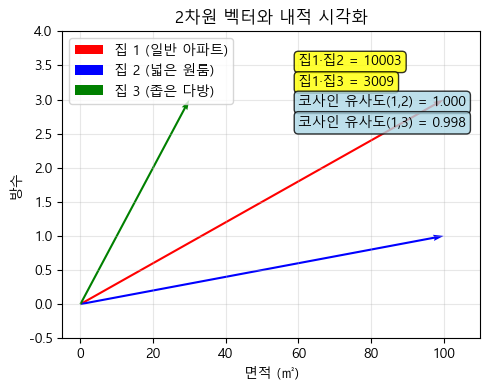

벡터 분석:
집 1 방향벡터: [0.9995503  0.02998651]
집 2 방향벡터: [0.99995   0.0099995]
집 3 방향벡터: [0.99503719 0.09950372]


In [30]:
# 윈도우 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우 기본 한글 폰트
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 기호 깨짐 방지

# 2차원 벡터로 시각화
plt.figure(figsize=(5, 4))

# 2차원 예시 벡터 (면적, 방수) - 더 극명한 차이
house_2d_1 = np.array([100, 3])   # 일반 아파트 (100㎡, 3개방)
house_2d_2 = np.array([100, 1])   # 넓은 원룸 (100㎡, 1개방)  
house_2d_3 = np.array([30, 3])    # 좁은 다방 (30㎡, 3개방)

# 벡터 시각화
plt.quiver(0, 0, house_2d_1[0], house_2d_1[1], 
           angles='xy', scale_units='xy', scale=1, color='red', width=0.005, label='집 1 (일반 아파트)')
plt.quiver(0, 0, house_2d_2[0], house_2d_2[1], 
           angles='xy', scale_units='xy', scale=1, color='blue', width=0.005, label='집 2 (넓은 원룸)')
plt.quiver(0, 0, house_2d_3[0], house_2d_3[1], 
           angles='xy', scale_units='xy', scale=1, color='green', width=0.005, label='집 3 (좁은 다방)')

# 내적 계산 및 표시
dot_2d_12 = np.dot(house_2d_1, house_2d_2)
dot_2d_13 = np.dot(house_2d_1, house_2d_3)
dot_2d_23 = np.dot(house_2d_2, house_2d_3)

# 코사인 유사도도 계산
cos_2d_12 = cosine_similarity(house_2d_1, house_2d_2)
cos_2d_13 = cosine_similarity(house_2d_1, house_2d_3)

plt.xlim(-5, 110)
plt.ylim(-0.5, 4)
plt.xlabel('면적 (㎡)')
plt.ylabel('방수')
plt.title('2차원 벡터와 내적 시각화')
plt.grid(True, alpha=0.3)
plt.legend()

# 텍스트로 내적 값과 코사인 유사도 표시
plt.text(60, 3.5, f'집1·집2 = {dot_2d_12}', fontsize=10, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.8))
plt.text(60, 3.2, f'집1·집3 = {dot_2d_13}', fontsize=10, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.8))
plt.text(60, 2.9, f'코사인 유사도(1,2) = {cos_2d_12:.3f}', fontsize=10, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.8))
plt.text(60, 2.6, f'코사인 유사도(1,3) = {cos_2d_13:.3f}', fontsize=10, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.8))

plt.tight_layout()
plt.show()

print("벡터 분석:")
print(f"집 1 방향벡터: {house_2d_1/np.linalg.norm(house_2d_1)}")
print(f"집 2 방향벡터: {house_2d_2/np.linalg.norm(house_2d_2)}")
print(f"집 3 방향벡터: {house_2d_3/np.linalg.norm(house_2d_3)}")

해석 :  
각 집 타입의 방향벡터가 명확히 다름을 확인  
집 2 (넓은 단층집)는 다른 집들과 방향이 다름   
내적은 크기와 방향을 모두 포함한 값  
코사인 유사도는 방향(벡터 간 각도)만 고려

---

## 4. 행렬의 기본 개념

### 4.1 행렬이란?  
>수학적 정의: 숫자들을 직사각형 형태로 배열한 것  
머신러닝 관점: 여러 데이터 포인트를 모은 데이터셋

In [31]:
# 행렬 생성 - 여러 집의 데이터를 모은 데이터셋
houses_matrix = np.array([
    [85, 3, 2, 5],    # 집 1
    [120, 4, 3, 7],   # 집 2
    [60, 2, 1, 3],    # 집 3
    [95, 3, 2, 4],    # 집 4
    [110, 4, 2, 6]    # 집 5
])

print("집 데이터 행렬:")
print(houses_matrix)
print()
print("행렬의 형태 (행, 열):", houses_matrix.shape)
print("행의 수 (샘플 수):", houses_matrix.shape[0])
print("열의 수 (특성 수):", houses_matrix.shape[1])
print()

# 특정 행과 열 접근
print("첫 번째 집 (행 0):", houses_matrix[0])
print("모든 집의 면적 (열 0):", houses_matrix[:, 0])
print("모든 집의 방수 (열 1):", houses_matrix[:, 1])

집 데이터 행렬:
[[ 85   3   2   5]
 [120   4   3   7]
 [ 60   2   1   3]
 [ 95   3   2   4]
 [110   4   2   6]]

행렬의 형태 (행, 열): (5, 4)
행의 수 (샘플 수): 5
열의 수 (특성 수): 4

첫 번째 집 (행 0): [85  3  2  5]
모든 집의 면적 (열 0): [ 85 120  60  95 110]
모든 집의 방수 (열 1): [3 4 2 3 4]


응용:  

행: 각 데이터 샘플 (집 하나)  
열: 각 특성 (면적, 방수 등)  
이것이 머신러닝에서 사용하는 기본 데이터 구조!

---

### 4.2 행렬 연산

In [32]:
# 행렬 기본 통계
print("데이터셋 기본 통계:")
print("=" * 30)
print("각 특성의 평균:")
print(f"면적: {np.mean(houses_matrix[:, 0]):.1f}㎡")
print(f"방수: {np.mean(houses_matrix[:, 1]):.1f}개")
print(f"화장실수: {np.mean(houses_matrix[:, 2]):.1f}개")
print(f"층수: {np.mean(houses_matrix[:, 3]):.1f}층")
print()

# 행렬 전체 평균 (각 특성별)
feature_means = np.mean(houses_matrix, axis=0)
print("특성별 평균 벡터:", feature_means)
print()

# 행렬 전체 표준편차
feature_stds = np.std(houses_matrix, axis=0)
print("특성별 표준편차:", feature_stds)

데이터셋 기본 통계:
각 특성의 평균:
면적: 94.0㎡
방수: 3.2개
화장실수: 2.0개
층수: 5.0층

특성별 평균 벡터: [94.   3.2  2.   5. ]

특성별 표준편차: [20.83266666  0.74833148  0.63245553  1.41421356]


응용 :  

데이터 전처리의 기본: 평균과 표준편차 계산   
axis=0: 행 방향으로 계산 (각 특성별)  
axis=1: 열 방향으로 계산 (각 샘플별)

---

### 4.3 행렬과 벡터의 곱

In [34]:
# 가중치 벡터 (집 가격을 예측하는 간단한 모델)
# 가정: 가격 = 면적*0.5 + 방수*10 + 화장실수*5 + 층수*2 (단위: 만원)
weights = np.array([0.5, 10, 5, 2])

print("가중치 벡터 (가격 예측 모델):")
print("면적 가중치:", weights[0])
print("방수 가중치:", weights[1])
print("화장실수 가중치:", weights[2])
print("층수 가중치:", weights[3])
print()

# 행렬-벡터 곱 (모든 집의 가격 예측)
predicted_prices = np.dot(houses_matrix, weights)

print("예측된 집 가격들:")
for i, price in enumerate(predicted_prices):
    print(f"집 {i+1}: {price:.1f}만원")

가중치 벡터 (가격 예측 모델):
면적 가중치: 0.5
방수 가중치: 10.0
화장실수 가중치: 5.0
층수 가중치: 2.0

예측된 집 가격들:
집 1: 92.5만원
집 2: 129.0만원
집 3: 61.0만원
집 4: 95.5만원
집 5: 117.0만원


응용:  

이것이 바로 선형 회귀 모델의 기본 형태!  
행렬-벡터 곱 = 모든 샘플에 대한 예측 한 번에 계산  
가중치 벡터 = 학습해야 할 파라미터  

---

### 5. 실제 데이터 적용 예제

In [36]:
# 더 현실적인 예제: 붓꽃 데이터 시뮬레이션
# 랜덤 시드 설정
np.random.seed(42)

# 붓꽃 3종의 특성 데이터 생성
# 특성: [꽃받침 길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비]
# 첫번째 인자 : 평균값, 두번째 인자 : 표준편차(각 특성별 변동성), 세번째 인자 : 20개 샘플과 4개의 특성
setosa = np.random.normal([5.0, 3.4, 1.5, 0.2], [0.3, 0.3, 0.2, 0.1], (20, 4))
versicolor = np.random.normal([6.0, 2.8, 4.0, 1.3], [0.4, 0.3, 0.4, 0.2], (20, 4))
virginica = np.random.normal([6.5, 3.0, 5.5, 2.0], [0.5, 0.3, 0.5, 0.3], (20, 4))

# 데이터 합치기
# np.vstack : 세 개의 배열을 세로로 쌓기 -> 60개 샘플과 4개의 특성
iris_data = np.vstack([setosa, versicolor, virginica])
# 각 샘플의 정답
labels = np.array([0]*20 + [1]*20 + [2]*20)  # 0: setosa, 1: versicolor, 2: virginica

# 데이터 구조 확인
# 지도학습의 기본 구조
# 특성 행렬 X
print("붓꽃 데이터 형태:", iris_data.shape) # (60, 4)
# 타겟 벡터 Y
print("레이블 형태:", labels.shape) # (60,)
print()

# 각 종의 평균 특성 계산
print("각 붓꽃 종의 평균 특성:")
species_names = ['Setosa', 'Versicolor', 'Virginica']
for i, name in enumerate(species_names):
    species_data = iris_data[labels == i]
    mean_features = np.mean(species_data, axis=0)
    print(f"{name}: {mean_features}")

붓꽃 데이터 형태: (60, 4)
레이블 형태: (60,)

각 붓꽃 종의 평균 특성:
Setosa: [4.97557765 3.32393864 1.44704855 0.21043424]
Versicolor: [5.97139143 2.8829005  3.95884113 1.27052603]
Virginica: [6.4347262  3.04225797 5.57902676 2.10308584]


해석 :  

1. 실제 머신러닝 데이터셋 구조 : 특성 행렬 + 레이블 벡터  

2. 다중 클래스 분류  

    클래스 3개: setosa, versicolor, virginica  
    특성 4개: 꽃받침 길이/너비, 꽃잎 길이/너비  
    샘플 60개: 각 클래스당 20개  

3. 탐색적 데이터 분석 (EDA)  

    각 클래스의 중심점(centroid) 계산  
    클래스 간 분리도 확인  
    특성의 중요도 파악 (어떤 특성이 분류에 유용한가?)  

    예상 결과 해석  
    Setosa: 꽃잎이 확실히 작음 → 쉽게 분류 가능  
    Versicolor vs Virginica: 크기 차이는 있지만 구분이 어려움  
    꽃잎 길이/너비가 꽃받침보다 분류에 더 유용할 것  

테스트 샘플: [5.5 3.  2.  0.5]
예측된 종: Setosa

각 종의 중심점과의 거리:
Setosa 중심점까지의 거리: 0.877
Versicolor 중심점까지의 거리: 2.160
Virginica 중심점까지의 거리: 4.032



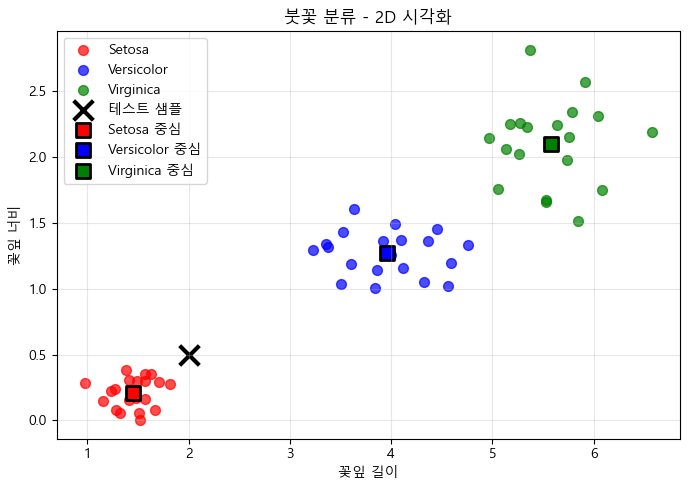

결론: 테스트 샘플을 'Setosa'로 분류합니다.


In [44]:
# 간단한 거리 기반 분류
def predict_species(sample, training_data, training_labels):
    """가장 가까운 훈련 샘플의 종을 반환"""
    distances = []
    for train_sample in training_data:
        # 유클리드 거리 계산
        distance = np.linalg.norm(sample - train_sample)
        distances.append(distance)
    
    # 가장 가까운 샘플의 인덱스
    nearest_idx = np.argmin(distances)
    return training_labels[nearest_idx]

# 테스트 샘플 생성
test_sample = np.array([5.5, 3.0, 2.0, 0.5])
print("테스트 샘플:", test_sample)

# 예측
predicted_species = predict_species(test_sample, iris_data, labels)
print(f"예측된 종: {species_names[predicted_species]}")
print()

# 각 종의 중심점과의 거리 계산
print("각 종의 중심점과의 거리:")
centroids = []
for i, name in enumerate(species_names):
    species_data = iris_data[labels == i]
    centroid = np.mean(species_data, axis=0)
    centroids.append(centroid)
    distance = np.linalg.norm(test_sample - centroid)
    print(f"{name} 중심점까지의 거리: {distance:.3f}")

print()

# 분류 과정 시각화 - 2D 투영 (꽃잎 길이 vs 꽃잎 너비)
plt.figure(figsize=(7, 5))

colors = ['red', 'blue', 'green']
for i, (name, color) in enumerate(zip(species_names, colors)):
    species_mask = labels == i
    plt.scatter(iris_data[species_mask, 2], iris_data[species_mask, 3], 
                c=color, label=name, alpha=0.7, s=50)

# 테스트 샘플 표시
plt.scatter(test_sample[2], test_sample[3], c='black', marker='x', s=200, 
            linewidth=3, label='테스트 샘플')

# 중심점들 표시
for i, (centroid, color, name) in enumerate(zip(centroids, colors, species_names)):
    plt.scatter(centroid[2], centroid[3], c=color, marker='s', s=100, 
                edgecolor='black', linewidth=2, label=f'{name} 중심')

plt.xlabel('꽃잎 길이')
plt.ylabel('꽃잎 너비')
plt.title('붓꽃 분류 - 2D 시각화')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"결론: 테스트 샘플을 '{species_names[predicted_species]}'로 분류합니다.")

해석:

최근접 이웃(KNN) 알고리즘의 기본 원리  
벡터 간 거리 계산이 분류의 핵심  
중심점(centroid) 계산 → 클러스터링의 기초

---

## 6. 마무리 및 다음 단계

**오늘 학습한 핵심 개념들**   

벡터: 하나의 데이터 포인트 표현  
행렬: 여러 데이터 포인트를 모은 데이터셋  
내적: 데이터 포인트간 유사도 측정  
행렬-벡터 곱: 모든 샘플에 대한 예측 계산  
거리 계산: 분류와 클러스터링의 기초  

**머신러닝 연결점**   

선형 회귀: 행렬-벡터 곱으로 예측값 계산  
분류: 벡터간 거리로 유사도 측정  
클러스터링: 중심점 계산으로 그룹화   
추천 시스템: 내적으로 유사도 계산  

**다음 학습 주제**  
고유값과 고유벡터를 배우면서 데이터의 주요 방향성 찾기  
차원 축소의 수학적 기초  
주성분 분석(PCA)의 원리

---